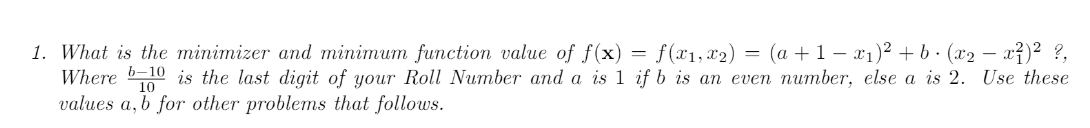

Same as Exercise 3 problem.  
Roll no : 23b1221  
b = 10*1 + 10 = 20  
a = 1  

Since both the terms can be made zero independently  
Minimizer : x1 = a + 1 = 2 , x2 = x1*x1 = 4  
Minimum function value : 0

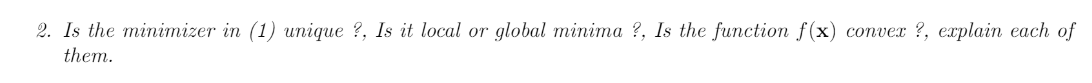

*UNIQUE*  
Yes it is unique, because setting (a + 1 - x1) to zero, fixes x1 and x2.  
And if f(x1,x2) is zero, then both the terms must be zero.  
*Type of MINIMA*  
It is a global minima because f(x1,x2) is always non negative.  
*CONVEX?*  
As our function is twice differentiable, the hessian matrix 

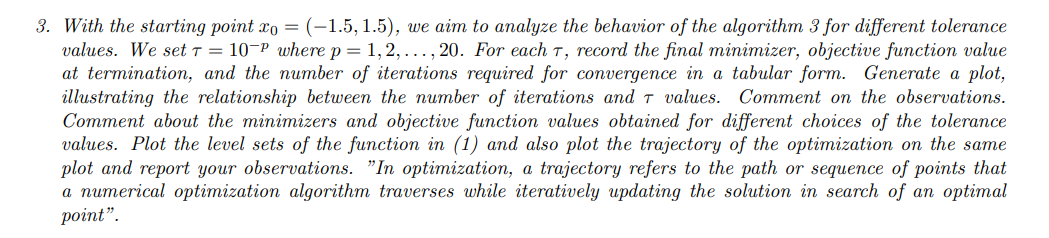

In [1]:
a = 1
b = 20

In [2]:
def f(x1,x2):
    return (a+1-x1)*(a+1-x1) + b*(x2 - x1*x1)*(x2 - x1*x1)

In [3]:
def df_dx1(x1,x2):
    return -2*(a+1-x1) + 2*b*(x2 - x1*x1)*(-2*x1)

In [4]:
def df_dx2(x1,x2):
    return 2*b*(x2 - x1*x1)

In [5]:
import numpy as np

In [6]:
def Hessian(x1,x2):
    arr = np.zeros((2,2))
    arr[0,0] = 2.0 - 4*b*(x2 - 3*x1*x1)
    arr[0,1] = -4*b*x1
    arr[1,0] = -4*b*x1
    arr[1,1] = 2*b
    return arr

In [7]:
Hessian(2,3)

array([[ 722., -160.],
       [-160.,   40.]])

In [8]:
def inv(matrix):
    return np.linalg.inv(matrix)

In [ ]:
inv([[0.5,0],[0,0.5]])

array([[2., 0.],
       [0., 2.]])

In [10]:
# Defining the norm function
def L2Norm(x,y):
    grad_x1 = df_dx1(x,y)
    grad_x2 = df_dx2(x,y)
    return np.sqrt(grad_x1** 2 + grad_x2** 2)

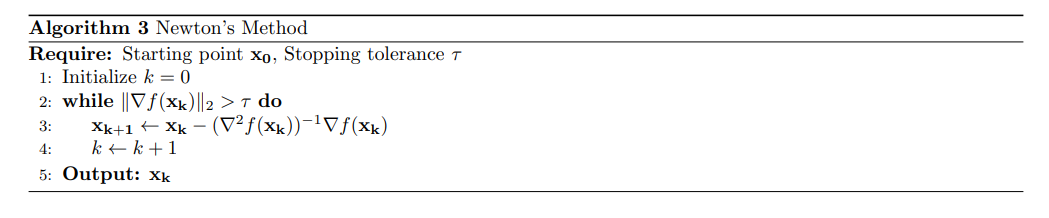

In [11]:
def Newton(x1_start,x2_start,p_values):

    
    iter_list = []
    minimizer_list = []
    function_value_list = []
      
    for i in range(len(p_values)):

        x1 = x1_start
        x2 = x2_start
        x_array = np.array([[x1],[x2]])
        tolerance = pow(0.1,p_values[i])

        iter = 0
        while(L2Norm(x_array[0],x_array[1]) > tolerance):
            df_dx1_temp = df_dx1(x_array[0],x_array[1])
            df_dx2_temp = df_dx2(x_array[0],x_array[1])
            df_dx_matrix = np.array([[df_dx1_temp],[df_dx2_temp]])
            # Hessian_matrix = Hessian(x1,x2)
            # Hessian_inv  = inv(Hessian_matrix)
            x_array = x_array - np.dot(inv(Hessian(x_array[0],x_array[1])),df_dx_matrix.reshape(2,1))
            print("term",  np.dot(inv(Hessian(x1,x2)),df_dx_matrix.reshape(2,1)))
            print("xarray", x_array)
            # print("Norm", L2Norm())
            iter = iter + 1

        iter_list.append(iter)
        minimizer_list.append(x_array)
        function_value_list.append(f(x_array[0],x_array[1]))

    return p_values,iter_list,minimizer_list,function_value_list


In [12]:
x1_start = -1.5
x2_start = 1.5
step_length = 0.001
p_values = [i for i in range(10)]
p_vals,iter_lst,minimizer_lst,function_value_lst = Newton(x1_start,x2_start,p_values)

term [[-0.11290323]
 [-0.41129032]]
xarray [[-1.38709677]
 [ 1.91129032]]
term [[-0.10740416]
 [ 0.30946535]]
xarray [[ 0.85618372]
 [-4.29925682]]
term [[ 15.26251011]
 [-50.81983772]]
xarray [[0.861838  ]
 [0.74273276]]
term [[-0.03661747]
 [ 0.10982044]]
xarray [[1.99854634]
 [2.70208162]]
term [[  5.83284629]
 [-18.79064472]]
xarray [[1.99857393]
 [3.99429776]]
term [[-0.11290323]
 [-0.41129032]]
xarray [[-1.38709677]
 [ 1.91129032]]
term [[-0.10740416]
 [ 0.30946535]]
xarray [[ 0.85618372]
 [-4.29925682]]
term [[ 15.26251011]
 [-50.81983772]]
xarray [[0.861838  ]
 [0.74273276]]
term [[-0.03661747]
 [ 0.10982044]]
xarray [[1.99854634]
 [2.70208162]]
term [[  5.83284629]
 [-18.79064472]]
xarray [[1.99857393]
 [3.99429776]]
term [[-0.11290323]
 [-0.41129032]]
xarray [[-1.38709677]
 [ 1.91129032]]
term [[-0.10740416]
 [ 0.30946535]]
xarray [[ 0.85618372]
 [-4.29925682]]
term [[ 15.26251011]
 [-50.81983772]]
xarray [[0.861838  ]
 [0.74273276]]
term [[-0.03661747]
 [ 0.10982044]]
xarray

C:\Users\DELL\AppData\Local\Temp\ipykernel_17988\3696073118.py:3: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  arr[0,0] = 2.0 - 4*b*(x2 - 3*x1*x1)
C:\Users\DELL\AppData\Local\Temp\ipykernel_17988\3696073118.py:4: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  arr[0,1] = -4*b*x1
C:\Users\DELL\AppData\Local\Temp\ipykernel_17988\3696073118.py:5: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  arr[1,0] = -4*b*x1


In [13]:
from tabulate import tabulate

In [14]:

# Combine into a table
table = zip(p_vals, iter_lst, minimizer_lst, function_value_lst)

# Define column headers
headers = ["P value", "Iterations", "Minimizer", "Function Value"]

# Print the table
print(tabulate(table, headers=headers, tablefmt="grid"))


+-----------+--------------+----------------+------------------+
|   P value |   Iterations | Minimizer      |   Function Value |
+===========+==============+================+==================+
|         0 |            5 | [[1.99857393]  |      2.03367e-06 |
|           |              |  [3.99429776]] |                  |
+-----------+--------------+----------------+------------------+
|         1 |            5 | [[1.99857393]  |      2.03367e-06 |
|           |              |  [3.99429776]] |                  |
+-----------+--------------+----------------+------------------+
|         2 |            5 | [[1.99857393]  |      2.03367e-06 |
|           |              |  [3.99429776]] |                  |
+-----------+--------------+----------------+------------------+
|         3 |            6 | [[2.        ]  |      8.27163e-11 |
|           |              |  [3.99999797]] |                  |
+-----------+--------------+----------------+------------------+
|         4 |            

In [15]:
import matplotlib.pyplot as plt

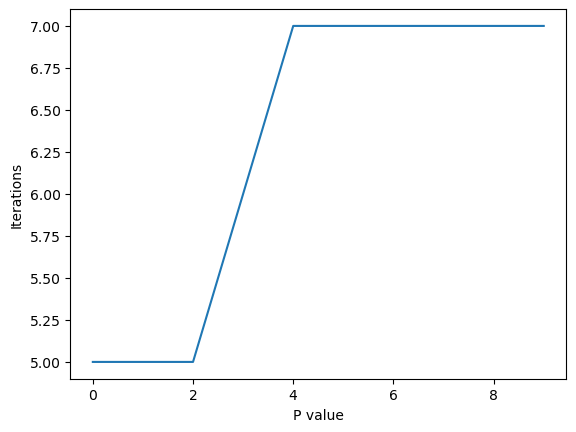

In [16]:
plt.plot(p_vals,iter_lst)
plt.xlabel("P value")
plt.ylabel("Iterations")
plt.show()

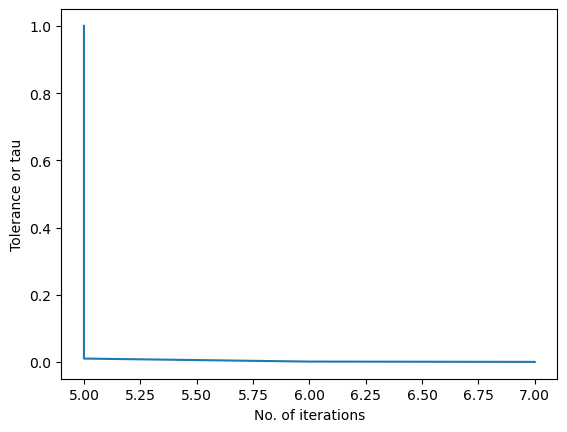

In [17]:
tolerance = [10**(-x) for x in p_vals]

plt.plot(iter_lst,tolerance)
plt.xlabel("No. of iterations")
plt.ylabel("Tolerance or tau")
plt.show()

In [18]:
def gradient_descent(start_X1, start_x2, step_length,p_values):

    iter_list = []
    minimizer_list = []
    function_value_list = []

    for i in range(len(p_values)):

        x1 = start_X1
        x2 = start_x2
        tolerance_lvl = pow(10,-p_values[i])

        iter = 0
        while(L2Norm(x1,x2) > tolerance_lvl):
            df_dx1_temp = df_dx1(x1,x2)
            df_dx2_temp = df_dx2(x1,x2)
            x1 = x1 - step_length*df_dx1_temp
            x2 = x2 - step_length*df_dx2_temp
            iter = iter + 1

        iter_list.append(iter)
        minimizer_list.append([x1,x2])
        function_value_list.append(f(x1,x2))

    return p_values,iter_list,minimizer_list,function_value_list

In [19]:
x1_start = -1.5
x2_start = 1.5
step_length = 0.001
p_values = [i for i in range(1,10)]
p_vals,iter_lst,minimizer_lst,function_value_lst = gradient_descent(x1_start,x2_start,step_length,p_values)

In [20]:
from tabulate import tabulate

In [21]:

# Combine into a table
table = zip(p_vals, iter_lst, minimizer_lst, function_value_lst)

# Define column headers
headers = ["P value", "Iterations", "Minimizer", "Function Value"]

# Print the table
print(tabulate(table, headers=headers, tablefmt="grid"))


+-----------+--------------+------------------------------------------+------------------+
|   P value |   Iterations | Minimizer                                |   Function Value |
+===========+==============+==========================================+==================+
|         1 |        10300 | [1.812045727301511, 3.2810994057316902]  |      0.035443    |
+-----------+--------------+------------------------------------------+------------------+
|         2 |        27916 | [1.979583453876314, 3.9185082306733996]  |      0.000418011 |
+-----------+--------------+------------------------------------------+------------------+
|         3 |        47321 | [1.9979406078473847, 3.9917424181066825] |      4.25286e-06 |
+-----------+--------------+------------------------------------------+------------------+
|         4 |        66924 | [1.9997938866422105, 3.999173163549329]  |      4.26004e-08 |
+-----------+--------------+------------------------------------------+------------------+

In [22]:
import matplotlib.pyplot as plt

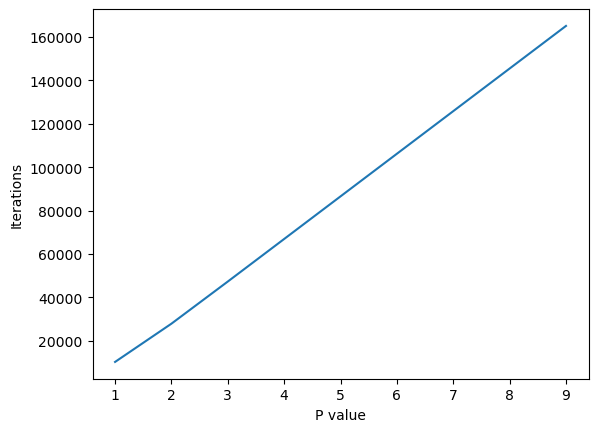

In [23]:
plt.plot(p_vals,iter_lst)
plt.xlabel("P value")
plt.ylabel("Iterations")
plt.show()

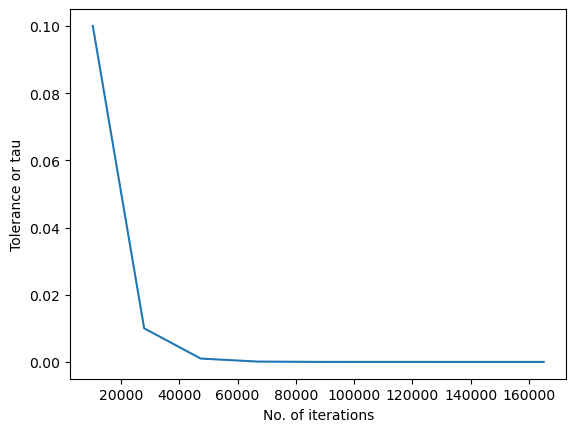

In [24]:
tolerance = [10**(-x) for x in p_vals]

plt.plot(iter_lst,tolerance)
plt.xlabel("No. of iterations")
plt.ylabel("Tolerance or tau")
plt.show()